In [1]:

# Import libraries
import pandas as pd
import numpy as np
import pdb
import json
import re
import requests
import sys
import types

In [6]:

# Import libraries
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

In [19]:
#pd.read_csv('https://github.com/IBM/iot-predictive-analytics/blob/master/data/iot_sensor_dataset.csv')

import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/IBM/iot-predictive-analytics/master/data/iot_sensor_dataset.csv"
df_iotdata=pd.read_csv(url,error_bad_lines=False)
df_iotdata.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [38]:
X=df_iotdata[["footfall",	"atemp"	,"selfLR"	,"ClinLR"	,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

y_target=df_iotdata['fail']
y_target.head()

X.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp
0,0,7,7,1,6,6,36,3,1
1,190,1,3,3,5,1,20,4,1
2,31,7,2,2,6,1,24,6,1
3,83,4,3,4,5,1,28,6,1
4,640,7,5,6,4,0,68,6,1


In [25]:
# Function to extract Column names of dataset
def dataset_columns(dataset):
    return list(dataset.columns.values)

# Function to train Logistic regression model
def train_logistic_regression(x_vals, y_vals):
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_vals, y_vals)
    return logistic_regression_model

# Function to return Predicted values
def score_data(trained_model, x_vals):
    ypredict = trained_model.predict(x_vals)
    return ypredict

# Function to calculate Prediction accuracy of model
def model_accuracy(trained_model, variables, targets):
    accuracy_score = trained_model.score(variables, targets)
    return accuracy_score

# Function to generate Confusion matrix
def confusion_matrix(actfail, predictfail):
  # Compute Confusion matrix
  print("Actual, Predicted Observations:  ",len(actfail), len(predictfail))
  # print(actfail, predictfail)
  anpn = 0
  anpy = 0
  aypn = 0
  aypy = 0
  
  for i in range(len(actfail)):
      if (actfail[i]==0 and predictfail[i]==0):
          anpn = anpn + 1
      elif (actfail[i]==0 and predictfail[i]==1):
          anpy = anpy + 1
      elif (actfail[i]==1 and predictfail[i]==0):
          aypn = aypn + 1
      else:
          aypy = aypy + 1
  # Confusoin matrix
  print ("--------------------------------------------")
  print ("Confusion Matrix")
  print ("--------------------------------------------")
  print ("              ", "Predicted N", "Predicted Y")
  print ("Actual N      ", anpn,"          ", anpy) 
  print ("Actual Y      ", aypn,"          ", aypy)
  print ("--------------------------------------------")
  print ("Total observations  :  ", anpn+anpy+aypn+aypy)
  print ("False Positives     :  ", anpy)
  print ("False Negatives     :  ", aypn)
  print ("Overall Accuracy    :  ", round((float(anpn+aypy)/float(anpn+anpy+aypn+aypy))*100, 2), "%")
  print ("Sensitivity/Recall  :  ", round((float(aypy)/float(aypn+aypy))*100, 2), "%")
  print ("Specificity         :  ", round((float(anpn)/float(anpn+anpy))*100, 2), "%")
  print ("Precision           :  ", round((float(aypy)/float(anpy+aypy))*100, 2), "%")
  print ("--------------------------------------------")

In [27]:
#Function to Read json parametric values
def f_getconfigval(injsonstr, invarname):
    # paramname, paramvalue
    # Unpack the json parameter values
    # This section requires regex
    for i in range(len(injsonstr)):
        pair = injsonstr[i]
        # Return parametric value
        if pair['paramname'] == invarname:
            return(pair['paramvalue'])




 # Read configuration parameters from JSON file
# @hidden_cell
# The section below needs to be modified:
#    Insert your credentials to read data from your data sources and replace 
#    the idaConnect() section below
# This function accesses a file in your Object Storage. The definition contains your
#    credentials
# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
inputfo = load_string(get_file(v_sampleConfigFileName))
inputfo = inputfo.decode('utf-8')

d = json.loads(inputfo)
print(d)           


# Read JSON configuration parametric values
# Unpack the json parameter values
# This section uses regex
v_feature_list = eval("list("+ f_getconfigval(d, "features") +")")
v_target = str(f_getconfigval(d, "target"))
v_train_datasize = float(f_getconfigval(d, "data_size"))


# Verify configuration parametric values
# print (feature_list, target, train_datasize)
print (v_feature_list, v_target, v_train_datasize)

NameError: name 'load_string' is not defined

In [39]:
# Split Training and Testing data
train_x, test_x, train_y, test_y = train_test_split( X, y_target, test_size=0.33,)
print ("Train x counts : ", len(train_x), len(train_x.columns.values))
print ("Train y counts : ", len(train_y))
 
print ("Test x counts : ", len(test_x), len(test_x.columns.values))
print ("Test y counts : ", len(test_y))

Train x counts :  632 9
Train y counts :  632
Test x counts :  312 9
Test y counts :  312


In [24]:
# Function to train Logistic regression model
def train_logistic_regression(x_vals, y_vals):
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(x_vals, y_vals)
    return logistic_regression_model


#Function to extract Column names of dataset
def dataset_columns(dataset):
    return list(dataset.columns.values)


# Print dataset column names
datacolumns = dataset_columns(df_iotdata)
print ("Data set columns : ", list(datacolumns))

Data set columns :  ['footfall', 'atemp', 'selfLR', 'ClinLR', 'DoleLR', 'PID', 'outpressure', 'inpressure', 'temp', 'fail']


In [84]:


# Training Logistic regression model
trained_logistic_regression_model = train_logistic_regression(train_x, train_y)

train_accuracy = model_accuracy(trained_logistic_regression_model, train_x, train_y)

# Testing the logistic regression model
test_accuracy = model_accuracy(trained_logistic_regression_model, test_x, test_y)

test_y_pred=trained_logistic_regression_model.predict(test_x)

from sklearn.metrics import f1_score
f1score=f1_score(test_y, test_y_pred, average='weighted' )


print ("Training Accuracy : ", round(train_accuracy * 100, 2), "%")
print ("Test Accuracy : ", round(test_accuracy * 100, 2), "%")
print ("f1 score Accuracy : ", f1score )

Training Accuracy :  91.14 %
Test Accuracy :  90.06 %
f1 score Accuracy :  0.9001060331677971


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf             

,principal component 1,principal component 2
0,-306.373114,-10.422879
1,-116.361546,-26.710660
2,-275.363775,-22.457386
3,-223.366661,-18.634984
4,333.606850,21.825528
...,...,...
939,-306.399585,25.644809
940,-306.384504,2.697157
941,-306.379932,-4.548788
942,-306.382024,-1.364708


In [56]:
finalDf = pd.concat([principalDf, df_iotdata[['fail']]], axis = 1)
finalDf

,principal component 1,principal component 2,fail
0,-306.373114,-10.422879,1
1,-116.361546,-26.710660,0
2,-275.363775,-22.457386,0
3,-223.366661,-18.634984,0
4,333.606850,21.825528,0
...,...,...,...
939,-306.399585,25.644809,1
940,-306.384504,2.697157,1
941,-306.379932,-4.548788,1
942,-306.382024,-1.364708,1


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

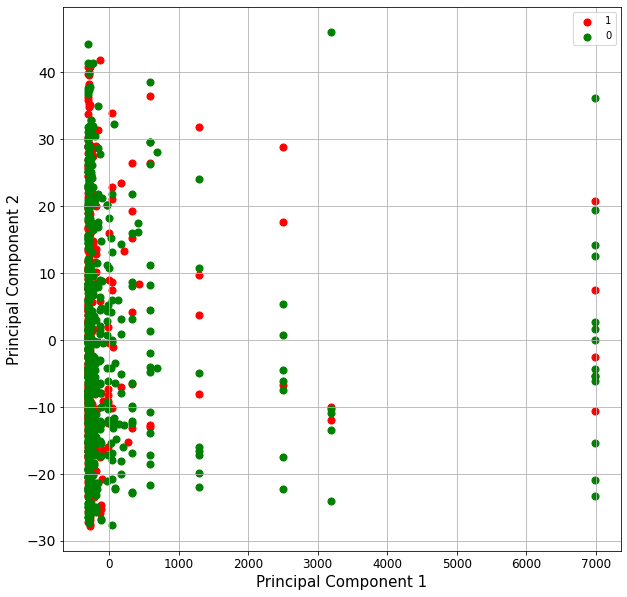

In [74]:

import matplotlib.pyplot as plt
plt.figure()
fig = plt.figure(figsize = (10,10))
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
fails = [1,0]
colors = ['r', 'g']
for fail, color in zip(fails,colors):
    indicesToKeep = finalDf['fail'] == fail
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
plt.legend(fails)
plt.grid()

In [63]:
finalDf

,principal component 1,principal component 2,fail
0,-306.373114,-10.422879,1
1,-116.361546,-26.710660,0
2,-275.363775,-22.457386,0
3,-223.366661,-18.634984,0
4,333.606850,21.825528,0
...,...,...,...
939,-306.399585,25.644809,1
940,-306.384504,2.697157,1
941,-306.379932,-4.548788,1
942,-306.382024,-1.364708,1


<Figure size 432x288 with 0 Axes>

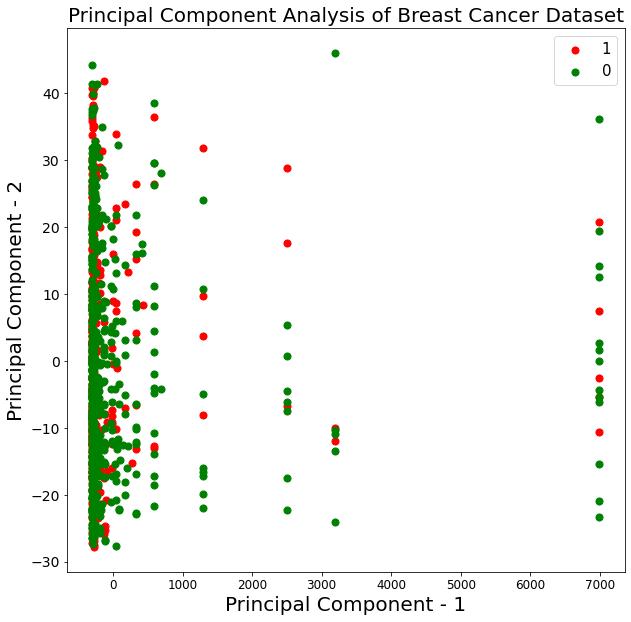

In [78]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [1, 0]
colors = ['r', 'g']
for fail, color in zip(targets,colors):
    indicesToKeep = df_iotdata['fail'] == fail
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.show()